In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [78]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [79]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

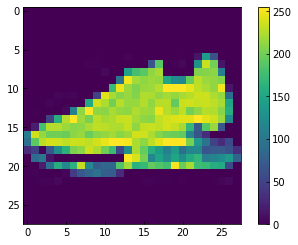

In [80]:
plt.figure()
plt.imshow(train_images[2234])
plt.colorbar()
plt.grid(False)

In [81]:
train_images = train_images / 255.0
test_images = test_images / 255.0

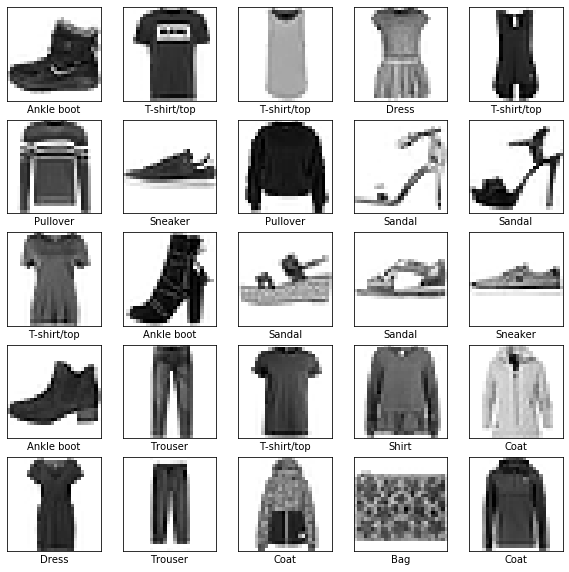

In [82]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5465 - acc: 0.8056
Epoch 2/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3863 - acc: 0.8590
Epoch 3/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3456 - acc: 0.8731
Epoch 4/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3229 - acc: 0.8805
Epoch 5/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3062 - acc: 0.8856
Epoch 6/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2907 - acc: 0.8924
Epoch 7/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2780 - acc: 0.8961
Epoch 8/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2694 - acc: 0.8997
Epoch 9/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2598 - acc: 0.9035
Epoch 10/10
60000/60000 [==============================] - 8s 131us/sampl

In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.3317 - acc: 0.8817
Test accuracy: 0.8817


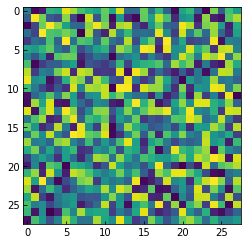

In [67]:
test_img = np.random.random((28,28))
plt.imshow(test_img)
test_img = (np.expand_dims(test_img,0))

In [85]:
predictions = model.predict(test_images)

In [86]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

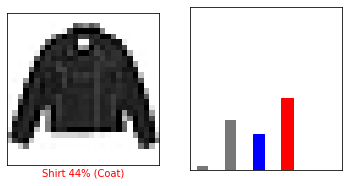

In [99]:
i = 5993
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)